In [1]:
import evaluation
from CA_model import CA_model
import topography
import matplotlib.pyplot as plt
import Iceing_model
import numpy as np
from skimage.transform import resize
from scipy.stats import wilcoxon

In [2]:
# build topography
# call Ising model on topography
# call CA model on topography

# build inflection distributions
# do non-paramteric t-test of the mean

In [3]:
size = 500

Baseline Ising model

In [4]:
iceing_test = Iceing_model.iceing_model(0.45, size)
ponds, sums = iceing_test.run(15_000_000)

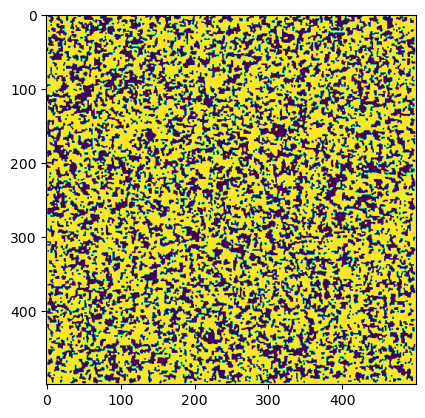

In [5]:
plt.imshow(ponds)

In [6]:
inflections_ising = evaluation.inflection_list(ponds)

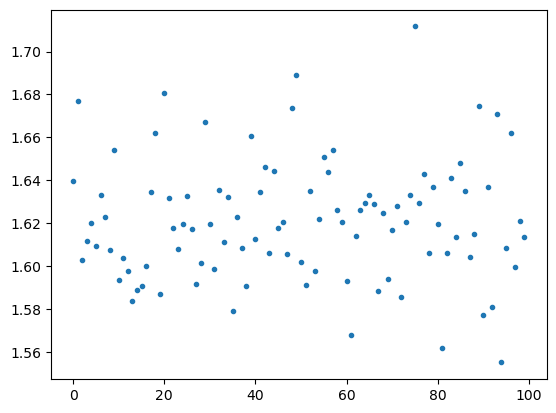

In [7]:
plt.plot(inflections_ising, ls = '', marker = '.')

In [8]:
areas_ising, perimeters_ising = evaluation.perim_area(ponds, pond_val = -1, ice_val = 1)

Text(0, 0.5, 'perimeter [m]')

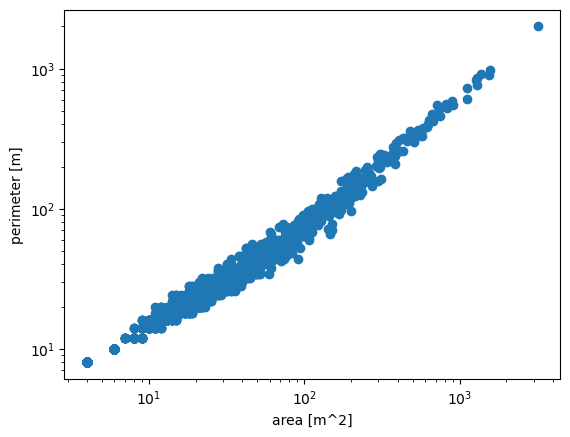

In [9]:
plt.scatter(areas_ising, perimeters_ising)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('area [m^2]')
plt.ylabel('perimeter [m]')

CA model

In [10]:
# dist_ca = np.random.normal(loc = 0.15, scale = 0.1, size = (int(size/4), int(size/4)))
# dist_ca = resize(dist_ca, (size, size))

In [11]:
# initialize model with 'snow dune topography' Popovic et al., 2020

res = size                      # size of the domain
mode = 'snow_dune'              # topography type
tmax = 2; dt = 0.1              # diffusion time and time-step if mode = 'diffusion' or mode = 'rayleigh'
g = 1                           # anisotropy parameter
sigma_h = 0.03                  # surface standard deviation
snow_dune_radius = 1.           # mean snow dune radius if mode = 'snow_dune'  
Gaussians_per_pixel = 0.2       # density of snow dunes if mode = 'snow_dune'  
snow_dune_height_exponent = 1.  # exponent that relates snow dune radius and snow dune height if mode = 'snow_dune'

mean_freeboard = 0.1

Tdrain = 10.; dt_drain = 0.5    # time and time-step of to drainage

# create topography
dist_ca = topography.Create_Initial_Topography(res = res, mode = mode, tmax = tmax, dt = dt, g = g, sigma_h = sigma_h, h = mean_freeboard, snow_dune_radius = snow_dune_radius,
            Gaussians_per_pixel = Gaussians_per_pixel, number_of_r_bins = 150, window_size = 5, snow_dune_height_exponent = snow_dune_height_exponent)


/Users/nik/opt/miniconda3/envs/IntroCLS/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/nik/opt/miniconda3/envs/IntroCLS/lib/python3.10/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


In [12]:
h = np.zeros(shape = (size, size))
ca_model = CA_model(dist_ca, h, dt = 15, dx = 1, ice_melting= False)

In [13]:
h, H, Ht = ca_model.run(25000)

KeyboardInterrupt: 

In [ ]:
np.save('experiment_data/h_snow_dune_500px_25000iter_ice_melt_False.npy', h)

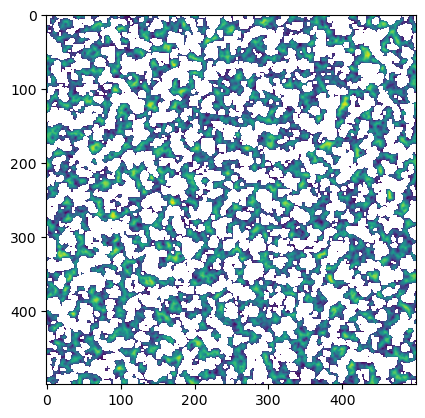

In [ ]:
thresh = 0.02
plt.imshow(np.ma.masked_where(h<thresh,h))

In [ ]:
inflections_ca = evaluation.inflection_list(np.where(h<thresh, 1, -1))

/Users/nik/Library/CloudStorage/OneDrive-Personal/MSc_CLS/complex_system_simulation/ComplexSystemSimulation/evaluation.py:144: RuntimeWarning: overflow encountered in cosh
  return (a1 / (2 * a2)) * np.log(np.cosh(a2 * (x - a3))) + (a4 / 2) * x + a5


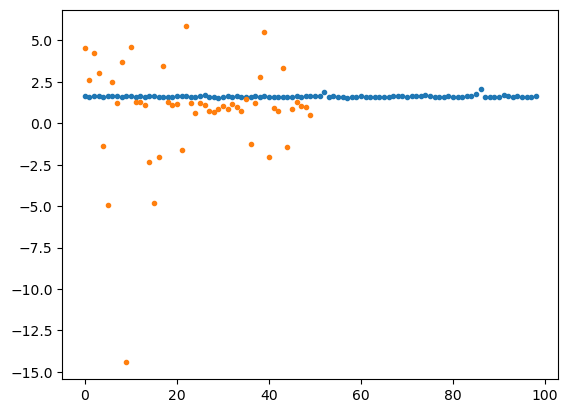

In [ ]:
plt.plot(inflections_ising, ls = '', marker = '.')
plt.plot(inflections_ca, ls = '', marker = '.')

In [ ]:
areas_ca, perimeters_ca = evaluation.perim_area(np.where(h<thresh, 1, -1), pond_val = -1, ice_val = 1)

Text(0, 0.5, 'perimeter [m]')

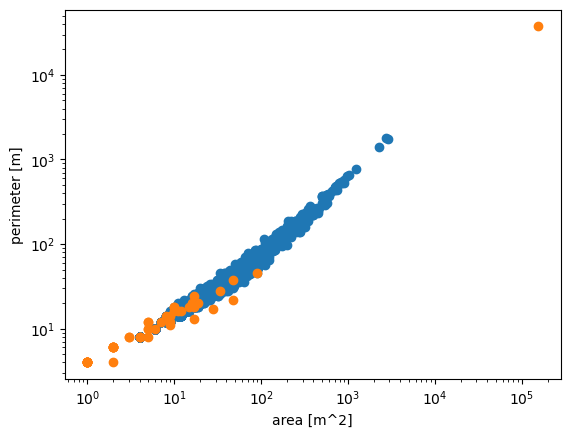

In [ ]:
plt.scatter(areas_ising, perimeters_ising)
plt.scatter(areas_ca, perimeters_ca)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('area [m^2]')
plt.ylabel('perimeter [m]')

Compare distributions with ttest

In [ ]:
inflections_ising_no = np.array(inflections_ising)[np.array(inflections_ising) < 1.67]

In [ ]:
wilcoxon(inflections_ising_no[:len(inflections_ca)], inflections_ca[:len(inflections_ising_no)])

WilcoxonResult(statistic=420.0, pvalue=0.03539143616493412)

(array([ 1.,  0.,  0.,  0.,  2.,  1.,  6., 28.,  7.,  5.]),
 array([-14.4325121 , -12.40498503, -10.37745796,  -8.3499309 ,
         -6.32240383,  -4.29487676,  -2.26734969,  -0.23982262,
          1.78770445,   3.81523152,   5.84275859]),
 <BarContainer object of 10 artists>)

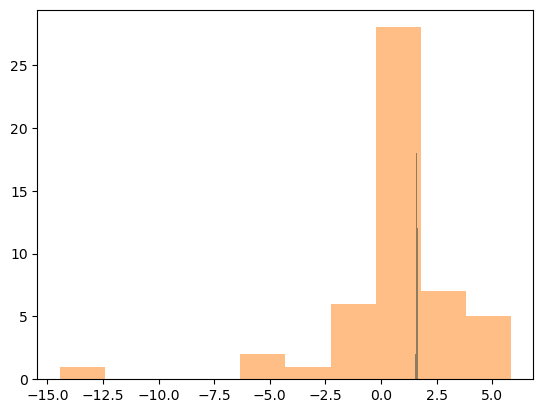

In [ ]:
plt.hist(inflections_ising_no)
plt.hist(inflections_ca, alpha = 0.5)

In [ ]:
frac_areas_ising, frac_dims_ising, _, areas_fit_ising, y_fit_ising = evaluation.fractal_dim(ponds)
frac_areas_ca, frac_dims_ca, _, areas_fit_ca, y_fit_ca = evaluation.fractal_dim(np.where(h<thresh, 1, -1))

ValueError: not enough values to unpack (expected 2, got 0)

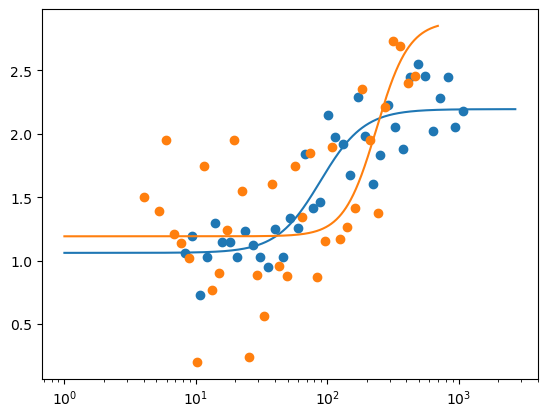

In [ ]:
plt.plot(frac_areas_ising, frac_dims_ising)
plt.scatter(areas_fit_ising, y_fit_ising)
plt.plot(frac_areas_ca, frac_dims_ca)
plt.scatter(areas_fit_ca, y_fit_ca)

plt.xscale('log')